In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Dropout, Flatten,
    BatchNormalization
)


In [10]:
data = pd.read_csv("../datasets/mnist/train.csv")
X = data.drop("label",axis=1).values
y = data["label"].values

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.33,
                                                     random_state=42)

In [12]:
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)

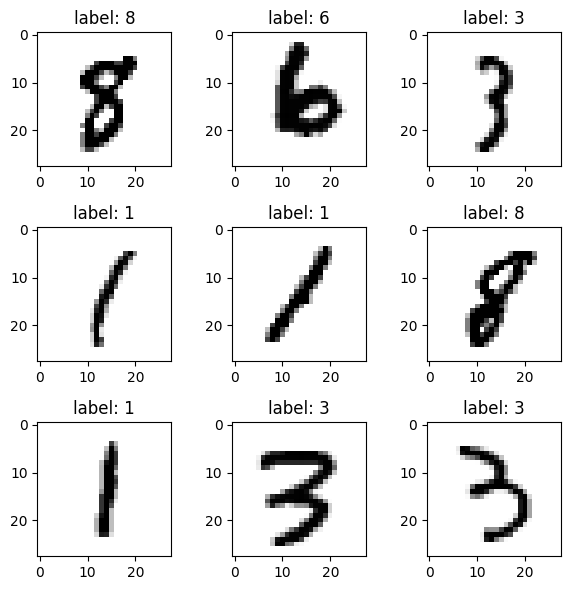

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].squeeze(), cmap='binary')
    digit = np.argmax(y_train[i])
    ax.set(title = f"label: {digit}")
fig.tight_layout()

# Model

In [17]:
model = Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size = (3,3), activation="relu"),
    Conv2D(filters=128, kernel_size = (3,3), activation="relu"),

    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size = (3,3), activation="relu"),

    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    BatchNormalization(),

    Dense(512,activation="relu"),
    Dropout(0.5),
    Dense(10,activation="softmax")
    
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [21]:
history = model.fit(
    X_train,
    y_train,
    batch_size =64,
    epochs = 5,
    validation_split=.2
)

Epoch 1/5
352/352 [==============================] - 50s 131ms/step - loss: 0.1727 - accuracy: 0.9465 - val_loss: 1.7687 - val_accuracy: 0.4829
Epoch 2/5
352/352 [==============================] - 48s 137ms/step - loss: 0.0634 - accuracy: 0.9817 - val_loss: 0.0737 - val_accuracy: 0.9790
Epoch 3/5
352/352 [==============================] - 47s 135ms/step - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.0712 - val_accuracy: 0.9829
Epoch 4/5
352/352 [==============================] - 47s 135ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0683 - val_accuracy: 0.9821
Epoch 5/5
352/352 [==============================] - 47s 135ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0500 - val_accuracy: 0.9885


In [ ]:
 # Save the history 

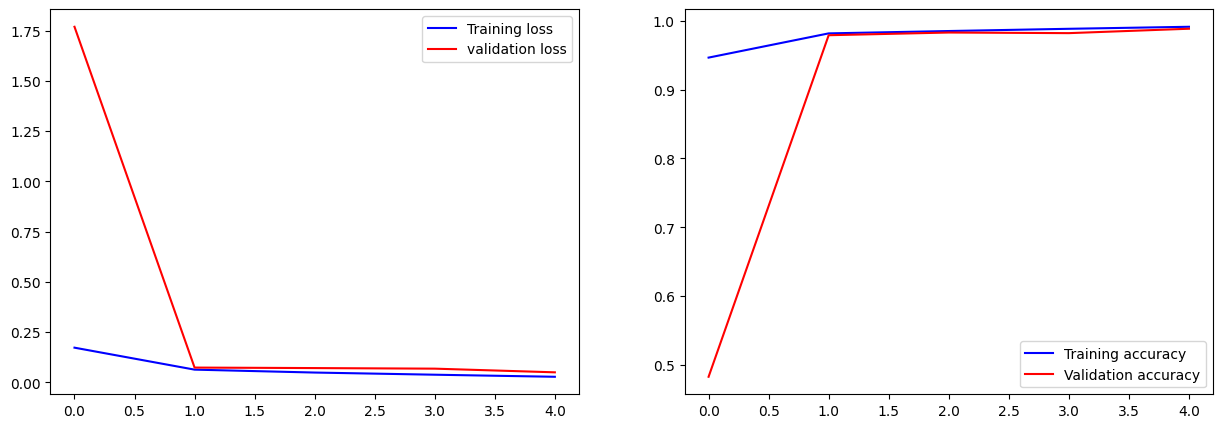

In [29]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
history = history.history
ax[0].plot(history['loss'], color='b', label="Training loss")
ax[0].plot(history['val_loss'], color='r', label="validation loss")
ax[0].legend()
ax[1].plot(history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].legend()

434/434 [==============================] - 8s 18ms/step


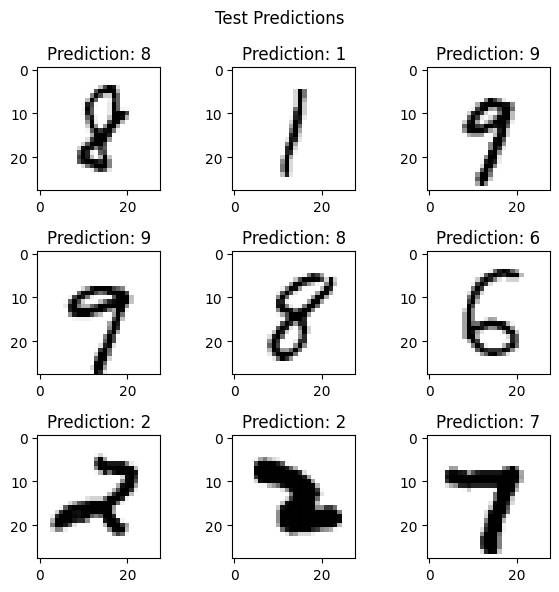

In [27]:
y_pred = model.predict(X_test)
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].squeeze(), cmap='binary')
    digit = np.argmax(y_test[i])
    ax.set(title = f"Prediction: {digit}")
fig.suptitle("Test Predictions")
fig.tight_layout()